# Excercise 7

## Part 1

In this excercise we have been asked to apply the stimulated annealing method. WE got a random rermutation of the traveling salesman problem and we have impleneted the code in such a way that it will chenge the permutation in such a way that gradually the cost will be reduced. We have used as a cost function the eucledian distance and we have considered that the nodes are on a circle.

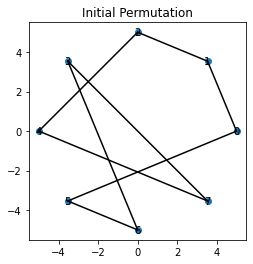

In [3]:
import math
from math import floor
import numpy as np
import matplotlib.pyplot as plt

def calculate_coordinates(radius, num_points):
    coordinates = []
    angle_increment = 2 * math.pi / num_points

    for i in range(num_points):
        angle = i * angle_increment
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        coordinates.append((x, y))

    return coordinates

# Example usage
radius = 5  # Radius of the circle
num_points = 8  # Number of points to calculate

points = calculate_coordinates(radius, num_points)

# Extract x and y coordinates as separate lists
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# Plot the points
plt.scatter(x_coords, y_coords)

# Connect the points in your order of choice
# order_choice = [5, 17, 3, 10, 19, 12, 1, 8, 15, 6, 16, 7, 14, 9, 2, 11, 18, 4, 13, 0]  # Example order
order_choice = [5, 0,1,2,4,7,3,6]

for i in range(len(order_choice) - 1):
    start_point = order_choice[i]
    end_point = order_choice[i + 1]
    plt.plot([x_coords[start_point], x_coords[end_point]], [y_coords[start_point], y_coords[end_point]], 'k-')

# Connect the last and first points to close the loop
start_point = order_choice[-1]
end_point = order_choice[0]
plt.plot([x_coords[start_point], x_coords[end_point]], [y_coords[start_point], y_coords[end_point]], 'k-')

# Add labels to the points
for i, point in enumerate(points):
    plt.text(point[0], point[1], str(i), ha='center', va='center')

# Set aspect ratio and plot title
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Initial Permutation")

# Display the plot
plt.show()

In [4]:
nodes = list(zip(x_coords,y_coords))

In [5]:
print(nodes)

[(5.0, 0.0), (3.5355339059327378, 3.5355339059327378), (3.061616997868383e-16, 5.0), (-3.5355339059327373, 3.5355339059327378), (-5.0, 6.123233995736766e-16), (-3.5355339059327386, -3.5355339059327373), (-9.184850993605148e-16, -5.0), (3.535533905932737, -3.5355339059327386)]


In [6]:
def euclidean(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**(1/2)

def euclidean_cost(points):
    cost = 0
    for i in range(len(points)-1):
        cost += euclidean(points[i],points[i+1])
    return cost + euclidean(points[0],points[-1])

def translate(path):
    result = []
    for i in path:
        result.append(nodes[i])
    return result

def permute(old_permutation, element):
    permutation = [i for i in old_permutation]
    if (element== len(permutation)-1):
        temp = permutation[0]
        permutation[0]= permutation[element]
        permutation[element]= temp
    else:
        temp = permutation[element+1]
        permutation[element+1]= permutation[element]
        permutation[element]= temp
    return permutation

def T(k):
    return 1/((i+k)**(1/2))

def pr(UXi,UYi,k):
    return math.e**(-(UYi-UXi)/T(k))

In [7]:
pr(90,100,50)

1.6273675610590153e-33

In [8]:
def stimulated_annealing(initial_permutation,repetitions):
    Xi = initial_permutation
    for i in range(repetitions):
        node = floor(num_points * np.random.uniform(0,1,1)[0])
        Yi = permute(Xi,node)
        UXi = euclidean_cost(translate(Xi))
        UYi = euclidean_cost(translate(Yi))
        if (UYi <UXi):
            Xi = Yi
            continue
        if (np.random.uniform(0,1,1)[0]<= pr(UXi,UYi,i)):
            Xi = Yi
    return Xi


In [11]:
Xi = stimulated_annealing(order_choice,100000)

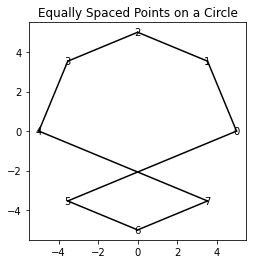

In [12]:
order_choice = Xi  # Example order

for i in range(len(order_choice) - 1):
    start_point = order_choice[i]
    end_point = order_choice[i + 1]
    plt.plot([x_coords[start_point], x_coords[end_point]], [y_coords[start_point], y_coords[end_point]], 'k-')

# Connect the last and first points to close the loop
start_point = order_choice[-1]
end_point = order_choice[0]
plt.plot([x_coords[start_point], x_coords[end_point]], [y_coords[start_point], y_coords[end_point]], 'k-')

# Add labels to the points
for i, point in enumerate(points):
    plt.text(point[0], point[1], str(i), ha='center', va='center')

# Set aspect ratio and plot title
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Equally Spaced Points on a Circle")

# Display the plot
plt.show()

we have ran multiple times the algorithm but it fails to 